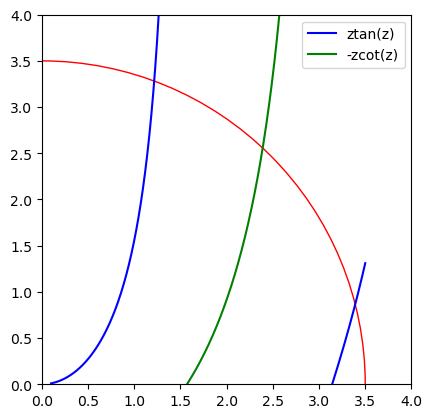

In [42]:
import numpy as np
import matplotlib.pyplot as plt


################
# Raw Plot
################


# Set up the plot
fig, ax = plt.subplots()

# Make x-axis
z = np.linspace(0.1, 3.5, 10000)  # Avoid zero to prevent division errors

# Z-Functions: ztan(z), -zcot(z) with masking to avoid asymptotes
tan = np.where(np.abs(np.tan(z)) < 10, z * np.tan(z), np.nan)  # Mask large values
cot = np.where(np.abs(1/np.tan(z)) < 10, -z * (1 / np.tan(z)), np.nan)  # Mask large values

# Plot the functions
ax.plot(z, tan, label="ztan(z)", color="blue")
ax.plot(z, cot, label="-zcot(z)", color="green")

# Add a circle with radius 3.5
circle = plt.Circle((0, 0), 3.5, color='r', fill=False)
ax.add_patch(circle)

# Set equal aspect ratio and add labels
ax.set_aspect('equal')
ax.legend()
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Show the plot
plt.show()

In [117]:
###################
# Numerical Calc
###################


# Function to find the closest intersection points with the circle
def find_intersections(z, func, radius=3.5):
    intersections = []
    min_distance_diff = float("inf")  # Initialize a large minimum difference
    closest_intersection = None  # Store the closest point in the current crossing

    for i in range(len(z)):
        y = func[i]     
        
        if np.isnan(y):
            continue
            
        distance = np.sqrt(z[i]**2 + y**2)
        distance_diff = abs(distance - radius)

        if distance_diff < 0.05:  # 0.05 is the tolerance for crossing
            if distance_diff < min_distance_diff:
                closest_intersection = (z[i], y)
                min_distance_diff = distance_diff
        else:
            # If we're outside the crossing range, store the last closest point
            if closest_intersection:
                intersections.append(closest_intersection)
                closest_intersection = None
                min_distance_diff = float("inf")

    if closest_intersection:
        intersections.append(closest_intersection)
    return intersections

# Find intersection points for ztan(z) and -zcot(z) with the circle
tan_intersections = find_intersections(z, tan)
cot_intersections = find_intersections(z, cot)

# Print intersection points
print("ztan(z) intersects the circle at:", tan_intersections)
print("-zcot(z) intersects the circle at:", cot_intersections)

# Calculating E values
def En(z, m_e=0.51E6, a=0.125):
    knowns = (1240**2)/(8*(np.pi**2)*m_e*(a**2))
    e_n = knowns * z**2
    return e_n

print(f"E1 = {En(1.2159915991599162)}, E2 = {En(2.3897889788978897)}, E3 = {En(3.391529152915292)}")

ztan(z) intersects the circle at: [(1.2159915991599162, 3.282178846025063), (2.2802980298029802, -2.6556391569760045), (3.391529152915292, 0.8657701674632877)]
-zcot(z) intersects the circle at: [(2.3897889788978897, 2.5560028607915797)]
E1 = 3.613471094308375, E2 = 13.956693582265075, E3 = 28.109592184411856


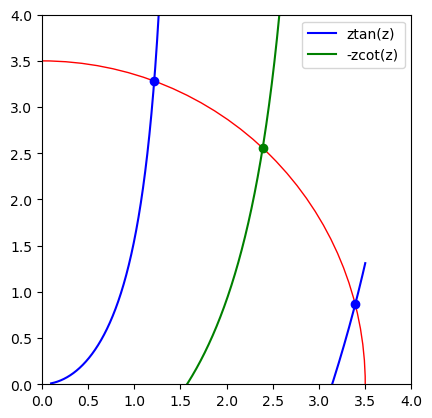

In [44]:
####################
# Revised Plot
####################

# Set up the plot
fig, ax = plt.subplots()

# Plot the functions
ax.plot(z, tan, label="ztan(z)", color="blue")
ax.plot(z, cot, label="-zcot(z)", color="green")

# Add a circle with radius 3.5
circle = plt.Circle((0, 0), 3.5, color='r', fill=False)
ax.add_patch(circle)

# Plot the intersection points
for x, y in tan_intersections:
    ax.plot(x, y, 'bo')  # Blue points for ztan(z) intersections
for x, y in cot_intersections:
    ax.plot(x, y, 'go')  # Green points for -zcot(z) intersections

# Set equal aspect ratio and add labels
ax.set_aspect('equal')
ax.legend()
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Show the plot
plt.show()

In [146]:
###############
# Part 3c
###############

def classicallyAllowed(En, m_e=0.51E6):
    knowns = 1240/np.sqrt(2*m_e)
    lam = knowns*(1/np.sqrt(En))
    return lam

def classicallyForbidden(En, V_0=30, m_e=0.51E6):
    knowns = 1240/(2*np.pi*np.sqrt(2*m_e))
    lam = knowns*(1/np.sqrt(V_0-En))
    return lam


allowed_1 = classicallyAllowed(En(1.2159915991599162))
allowed_2 = classicallyAllowed(En(2.3897889788978897))
allowed_3 = classicallyAllowed(En(3.391529152915292))
forbidden_1 = classicallyForbidden(En(1.2159915991599162))
forbidden_2 = classicallyForbidden(En(2.3897889788978897))
forbidden_3 = classicallyForbidden(En(3.391529152915292))

print(f"Allowed Area Wavelengths: {allowed_1}, {allowed_2}, {allowed_3}. \nForbidden Area Wavelengths: {forbidden_1}, {forbidden_2}, {forbidden_3}")

Allowed Area Wavelengths: 0.6458911097248131, 0.3286474957967436, 0.231576415235097. 
Forbidden Area Wavelengths: 0.03804088387978407, 0.048785952853512005, 0.14212287323631087


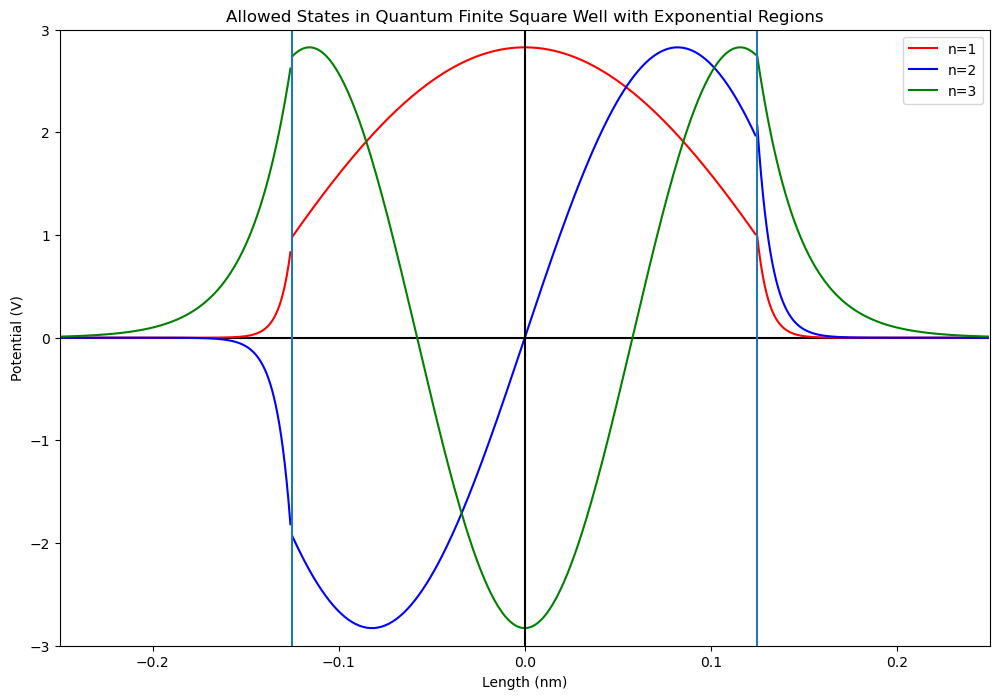

In [165]:
# Plot
x = np.arange(-0.25, 0.25, 0.001)
x_exp_grow = np.arange(-0.25, -0.125, 0.001)
x_exp_dec = np.arange(0.125, 0.25, 0.001)
x_classall = np.arange(-0.125, 0.125, 0.001)

amp = np.sqrt(2 / 0.25)

def sines(k):
    sin = amp * np.sin(k * x_classall)
    return sin

def cosines(trigger, k):
    cos = trigger * amp * np.cos(k * x_classall)
    return cos

def expGrowth(c, k):
    exp_g = c*np.exp(k*x_exp_grow)
    return exp_g

def expDecay(c, k):
    exp_d = c*np.exp(-k*x_exp_dec)
    return exp_d

def expAmp(trigger, x, ca_lam, forb_lam):
    k = 2*np.pi/ca_lam
    q = 2*np.pi/forb_lam
    exp_amp = trigger*amp*np.cos(k*x)/np.exp(q*x)
    return exp_amp
    

# Plot full range but sine functions only within the central region
plt.figure(figsize=(12,8))
plt.plot(x, np.zeros_like(x), color='black')

plt.plot(x_classall, cosines(1, 2*np.pi/allowed_1), color='red', label="n=1")
plt.plot(x_classall, sines(2*np.pi/allowed_2), color='blue', label="n=2")
plt.plot(x_classall, cosines(-1, 2*np.pi / allowed_3), color='green', label="n=3")

plt.plot(x_exp_grow, expGrowth(expAmp(1, -0.125, allowed_1, forbidden_1), 2*np.pi/forbidden_1), color='red')
plt.plot(x_exp_grow, expGrowth(expAmp(1, -0.125, allowed_2, forbidden_2), 2*np.pi/forbidden_2), color='blue')
plt.plot(x_exp_grow, expGrowth(expAmp(-1, -0.125, allowed_3, forbidden_3), 2*np.pi/forbidden_3), color='green')

plt.plot(x_exp_dec, expDecay(expAmp(1, -0.125, allowed_1, forbidden_1), 2*np.pi/forbidden_1), color='red')
plt.plot(x_exp_dec, expDecay(expAmp(-1, -0.125, allowed_2, forbidden_2), 2*np.pi/forbidden_2), color='blue')
plt.plot(x_exp_dec, expDecay(expAmp(-1, -0.125, allowed_3, forbidden_3), 2*np.pi/forbidden_3), color='green')

# Optional: Set x-limits explicitly to show the full range and ensure sine functions stay in the middle
plt.xlim(-0.25, 0.25)
plt.ylim(-3, 3)  # Adjust y-limits as needed to fit the sine amplitude
plt.axvline(x=-0.125)
plt.axvline(x=0.125)
plt.axvline(x=0, color="black")
plt.legend()
plt.xlabel("Length (nm)")
plt.ylabel("Potential (V)")
plt.title("Allowed States in Quantum Finite Square Well with Exponential Regions")
plt.show()

I apologize the code isn't the best and my lines are matching up exactly. This was... difficult to say the least. Given a couple of weeks I could have crushed this.